In [3]:
import sqlite3

# Create a database file
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert some sample sales data
sales_data = [
    ("Laptop", 5, 50000),
    ("Mobile", 10, 15000),
    ("Tablet", 7, 20000),
    ("Headphones", 15, 2000),
    ("Charger", 20, 500)
]

for row in sales_data:
    print(row)

conn.close()

('Laptop', 5, 50000)
('Mobile', 10, 15000)
('Tablet', 7, 20000)
('Headphones', 15, 2000)
('Charger', 20, 500)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Connect to database
conn = sqlite3.connect("sales_data.db")

# SQL query
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Load into pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print results
print(df)

conn.close()


      product  total_qty   revenue
0     Charger         20   10000.0
1  Headphones         15   30000.0
2      Laptop          5  250000.0
3      Mobile         10  150000.0
4      Tablet          7  140000.0


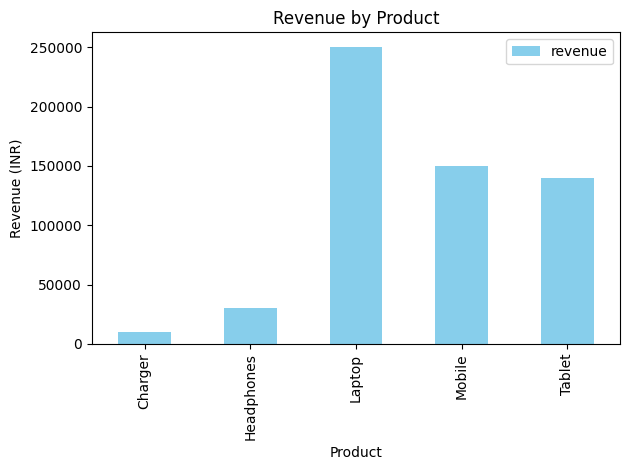

In [5]:
# Bar chart for revenue
df.plot(kind='bar', x='product', y='revenue', color='skyblue')
plt.title("Revenue by Product")
plt.ylabel("Revenue (INR)")
plt.xlabel("Product")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Save chart
plt.show()
